In [3]:
import os
import mlflow
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pathlib import Path
from libs import paths

os.chdir("..")

In [11]:
data = pd.read_parquet(paths.RAW_DATA_FILE)

In [12]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [13]:
data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

data = pd.read_parquet(paths.RAW_DATA_FILE)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
y_test.values.reshape(1, -1)

array([[1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1.,
        2., 1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0.]],
      dtype=float32)

In [32]:
np.concatenate((X_test_scaled, y_test.values.reshape(-1, 1)), axis=1)

array([[ 0.35451684, -0.58505976,  0.55777524,  0.02224751,  1.        ],
       [-0.13307079,  1.65083742, -1.16139502, -1.17911778,  0.        ],
       [ 2.30486738, -1.0322392 ,  1.8185001 ,  1.49058286,  2.        ],
       [ 0.23261993, -0.36147005,  0.44316389,  0.4227026 ,  1.        ],
       [ 1.2077952 , -0.58505976,  0.61508092,  0.28921757,  1.        ],
       [-0.49876152,  0.75647855, -1.27600637, -1.04563275,  0.        ],
       [-0.2549677 , -0.36147005, -0.07258719,  0.15573254,  1.        ],
       [ 1.32969211,  0.08570939,  0.78699794,  1.49058286,  2.        ],
       [ 0.47641375, -1.92659808,  0.44316389,  0.4227026 ,  1.        ],
       [-0.01117388, -0.80864948,  0.09932984,  0.02224751,  1.        ],
       [ 0.84210448,  0.30929911,  0.78699794,  1.09012776,  2.        ],
       [-1.23014297, -0.13788033, -1.33331205, -1.44608785,  0.        ],
       [-0.37686461,  0.98006827, -1.39061772, -1.31260282,  0.        ],
       [-1.10824606,  0.08570939, -1.2

In [37]:
pd.DataFrame(np.c_[X_test_scaled, y_test])

,0,1,2,3,4
0,0.354517,-0.585060,0.557775,0.022248,1.0
1,-0.133071,1.650837,-1.161395,-1.179118,0.0
2,2.304867,-1.032239,1.818500,1.490583,2.0
3,0.232620,-0.361470,0.443164,0.422703,1.0
4,1.207795,-0.585060,0.615081,0.289218,1.0
5,-0.498762,0.756479,-1.276006,-1.045633,0.0
6,-0.254968,-0.361470,-0.072587,0.155733,1.0
7,1.329692,0.085709,0.786998,1.490583,2.0
8,0.476414,-1.926598,0.443164,0.422703,1.0
9,-0.011174,-0.808649,0.099330,0.022248,1.0


In [36]:
pd.concat([pd.DataFrame(X_test_scaled, columns=X_test.columns), y_test], axis=0)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.354517,-0.585060,0.557775,0.022248,NaN
1,-0.133071,1.650837,-1.161395,-1.179118,NaN
2,2.304867,-1.032239,1.818500,1.490583,NaN
3,0.232620,-0.361470,0.443164,0.422703,NaN
4,1.207795,-0.585060,0.615081,0.289218,NaN
5,-0.498762,0.756479,-1.276006,-1.045633,NaN
6,-0.254968,-0.361470,-0.072587,0.155733,NaN
7,1.329692,0.085709,0.786998,1.490583,NaN
8,0.476414,-1.926598,0.443164,0.422703,NaN
9,-0.011174,-0.808649,0.099330,0.022248,NaN


In [7]:
from libs import data_utils

X_train, y_train = data_utils.load_train_data()
X_test, y_test = data_utils.load_test_data()

In [8]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-1.473937,1.203658,-1.562535,-1.312603
1,-0.133071,2.992376,-1.276006,-1.045633
2,1.085898,0.085709,0.385858,0.289218
3,-1.230143,0.756479,-1.218701,-1.312603
4,-1.717731,0.309299,-1.390618,-1.312603
...,...,...,...,...
129,NaN,NaN,NaN,NaN
140,NaN,NaN,NaN,NaN
130,NaN,NaN,NaN,NaN
121,NaN,NaN,NaN,NaN


In [5]:
TRAIN_DATA_PATH = Path("data/01_processed/train_data.parquet")
print(TRAIN_DATA_PATH.parent)

data/01_processed


In [19]:
clf = LogisticRegression()

print(clf._estimator_type)

classifier


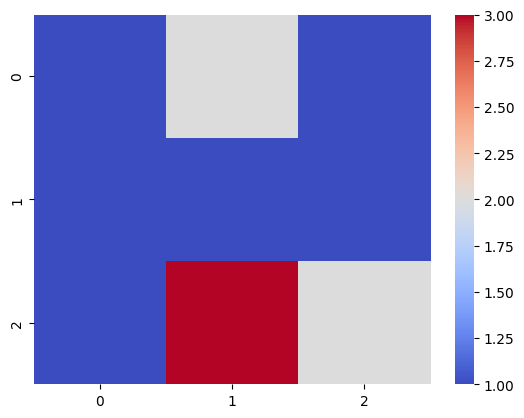

In [3]:
res = sns.heatmap([[1, 2, 1], [1, 1, 1], [1, 3, 2]], cmap="coolwarm")

In [2]:
clf = LogisticRegression()
type(clf)

sklearn.linear_model._logistic.LogisticRegression

In [21]:
data = datasets.load_iris(as_frame=True)
X = data.data
y = data.target
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [21]:
df = pd.concat([X, y], axis=1)
df.rename(columns={'target': 'species'})

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [27]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [43]:
value = np.float64(64.113114).item()

In [44]:
value if isinstance(value, (float, int)) else value.item()

64.113114

In [40]:
X_test.values if isinstance(X_test, (pd.DataFrame, pd.Series)) else X_test

array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [4.8, 3. , 1.4, 0.1],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.4, 2.8, 5.6, 2.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 2.8, 5.6, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3. , 5.2, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3. , 1.4, 0.3],
       [4.8, 3.1, 1.6, 0.2]])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:

dataset = mlflow.data.from_pandas(df, targets="species")



In [23]:
dataset.df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [14]:
y.unique().tolist()

[0, 1, 2]